#### Paper data and plots

This notebook plots the data presented in the paper 'Compare the Pair: Rotated vs. Unrotated Surface Codes at Equal Logical Error Rates' by importing the already-collected data and plotting it. For an example of how to generate this data before plotting it see 'example.ipynb'.

##### Requirements

In [1]:
# pip install stim      # Stim: a stabiliser circuit simulator

In [2]:
# pip install sinter==1.13.0     # Sinter: for bulk sampling of stim circuits

In [3]:
import sinter
import stim

import os
import sys
import pickle

sys.path.insert(0, 'functions') 
import morefuncs as morefuncs
import com_funcs5 as funcs

# Update with any changes to these files:
from importlib import reload
reload(morefuncs)
reload(funcs);

##### Import the collected data:

In [ ]:
import pickle

# Load the SD (standard depolarising) stats:
with open(f'pickled_stats/SD_importedstats.pickle', 'rb') as file:
    mylist = pickle.load(file)

##### Threshold plots: $p_L$ vs. $p$

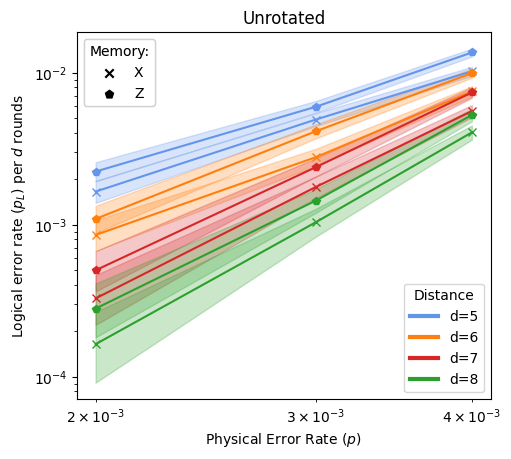

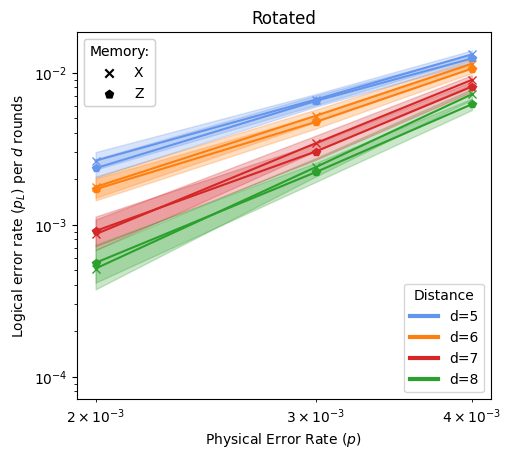

In [7]:
# python:
reload(funcs)

funcs.plot_thresholds(mylist, roorder, unroorder)

##### Fit to scaling function $p_L = \alpha ( p / \beta)^{\gamma d + \delta}$

<IPython.core.display.Math object>


distances = combined

unro z 10231203

    α = 0.055 ± 0.026
    β = 0.00683 ± 0.00007
    γ = 0.557 ± 0.082
    δ = 0.15 ± 0.54


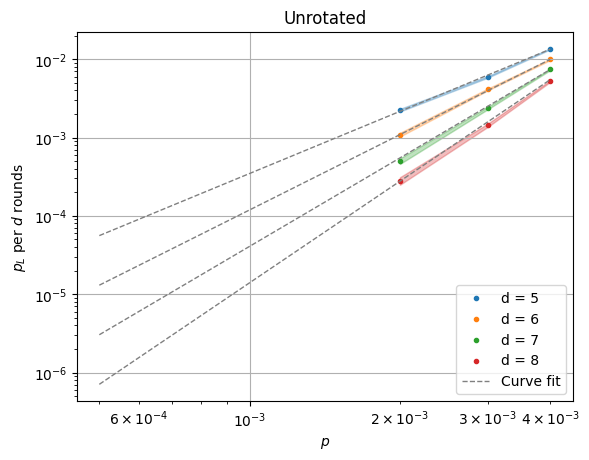


ro z 10231203

    α = 0.061 ± 0.026
    β = 0.00776 ± 0.00004
    γ = 0.367 ± 0.065
    δ = -0.52 ± 0.43


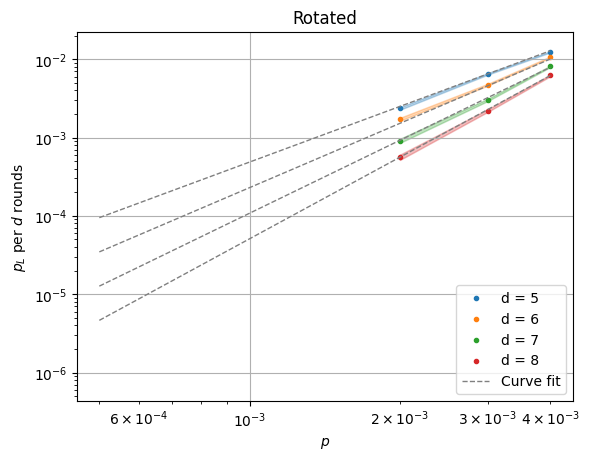

In [8]:
reload(funcs)

mylist = sinter.stats_from_csv_files(f'collected_stats/example_stats.csv')

distances = 'combined' # choices are 'odd', 'even' or 'combined'
b = 'z' # choices are x or z 
roorder = CNOT_order
unroorder = CNOT_order

funcs.fit_scaling_and_plot(mylist, distances, b, roorder, unroorder)

##### Plot as $p_L$ vs. $\sqrt{n}$

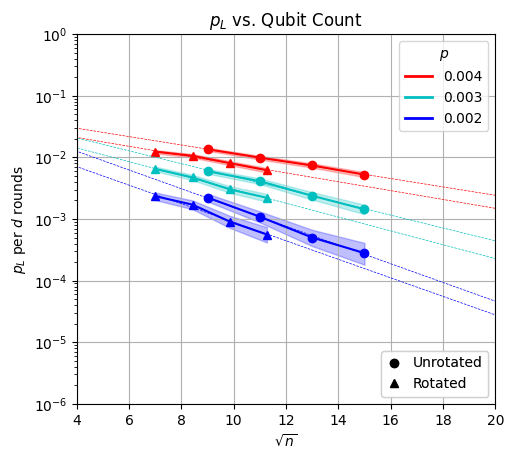

In [15]:
!mkdir -p plots/footprints

reload(funcs)

b = 'z' 
ps = ps
roorder = CNOT_order
unroorder = CNOT_order

mylist = sinter.stats_from_csv_files(f'collected_stats/example_stats.csv')

funcs.plot_pL_vs_qubit_count(mylist, b, roorder, unroorder)

##### Memory time vs. $\sqrt{n}$

This is a reformulation of the $p_L$ vs. $\sqrt{n}$ plots above, converting the $p_L$ per $d$ rounds to be the length of time (assuming one stabiliser measurement cycle take a microsecond) before $p_L$ over the entire shot of the memory experiment equals $p$.

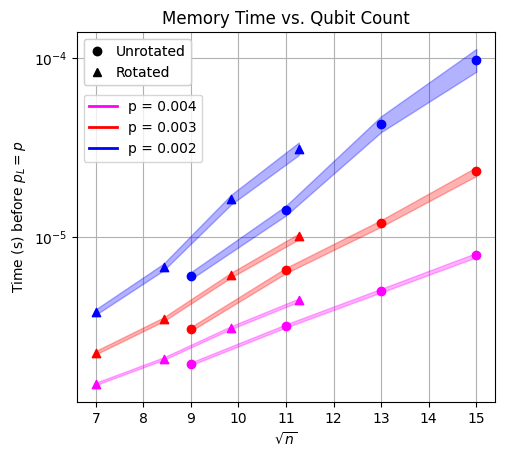

In [16]:
!mkdir -p plots/memory_times
reload(funcs)

roorder = CNOT_order
unroorder = CNOT_order

b = 'x'

funcs.plot_memory_times(mylist, b, roorder, unroorder, ps = None)

##### Plot 'teraquop' count :$\ $ the number of qubits required to reach $p_L = 10^{-12}$

<IPython.core.display.Math object>

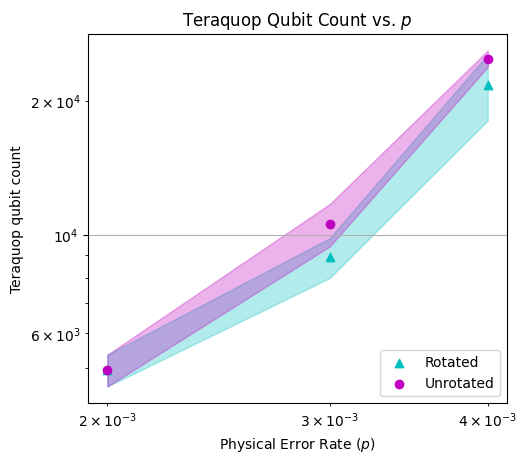

In [17]:
reload(funcs)
!mkdir -p plots/teraquops

b = 'z' 

noise_model = 'SD' 

roorder = CNOT_order
unroorder = CNOT_order

funcs.plot_teraquop(mylist, b, roorder, unroorder, optional_plot = False)

##### Plot ratios of qubit counts vs. $p_L$

This is the projected number of qubits used by the rotated surface code divided by the number of qubits used by the unrotated surface code to achieve the same $p_L$

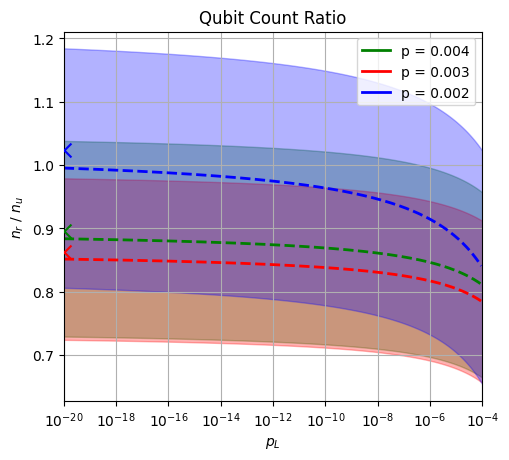

In [11]:
!mkdir -p plots/ratio_plot
reload(funcs)

funcs.plot_ratio(mylist, b, CNOT_order, CNOT_order)